# Find Beta: Análisis
<div style="text-align: center;">
    <img src="../resources/find_logo.png" alt="Descripción de la imagen" style="width: 30%;"/>
</div>

Si eres emprendedor y no tienes claro qué tipo de comida elegir ni cuál sería el mejor municipio para tu inversión. Este notebook ilustrará cómo nuestra aplicación puede guiarte a través de los datos.
Aunque estamos trabajando con una versión beta, este ejemplo muestra el potencial de la app.

---

## Carga de las funciones necesarias

Para empezar, cargaremos las funciones esenciales para procesar los datos y realizar los análisis.

---


In [2]:
import sys
import os

parent_directory = os.path.dirname(os.getcwd())
folder_path = os.path.join(parent_directory, "app_functions")
sys.path.append(folder_path)

import search as sr 
import analysis as an
import utils as utl

df_establishments=utl.create_data_frame_establishments()
df_municipality=utl.create_data_frame_municipality()
dict_ranking=utl.create_data_tasteatlas()

 ---

## La primera interrogante que nos surge es de que tipo de comida creo mi restuante especializado

Bueno según TastleAtlas (una guía culinaria) la comida italiana lidera el ranking global de popularidad gastronómica , y también es muy popular entre nosostros los cubanos por su fácil preparación .Este reconocimiento la convierte en una opción estratégica para atraer tanto a residentes como a turistas en La Habana.

---

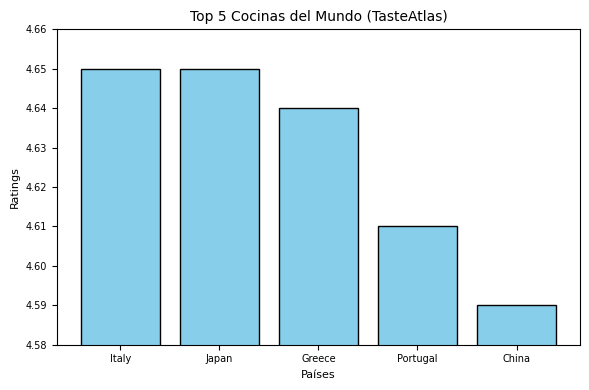

In [2]:
an.plot_ranking_tastleatlas(dict_ranking)

<!-- Analisar cuantos restauantes hay por municipios -->

---

## Ya tengo la especialidad de mi restaurante, pero ¿cómo sé en qué municipio debo ponerlo?

No te preocupes, recuerda que Find Beta tiene algunas sorpresas que te permiten saber los datos a tener en cuenta a la hora de ubicar un establecimiento de este tipo. Pero antes, vamos a revisar el número de establecimientos que tenemos por municipio, para saber en cuáles tenemos más información.

---

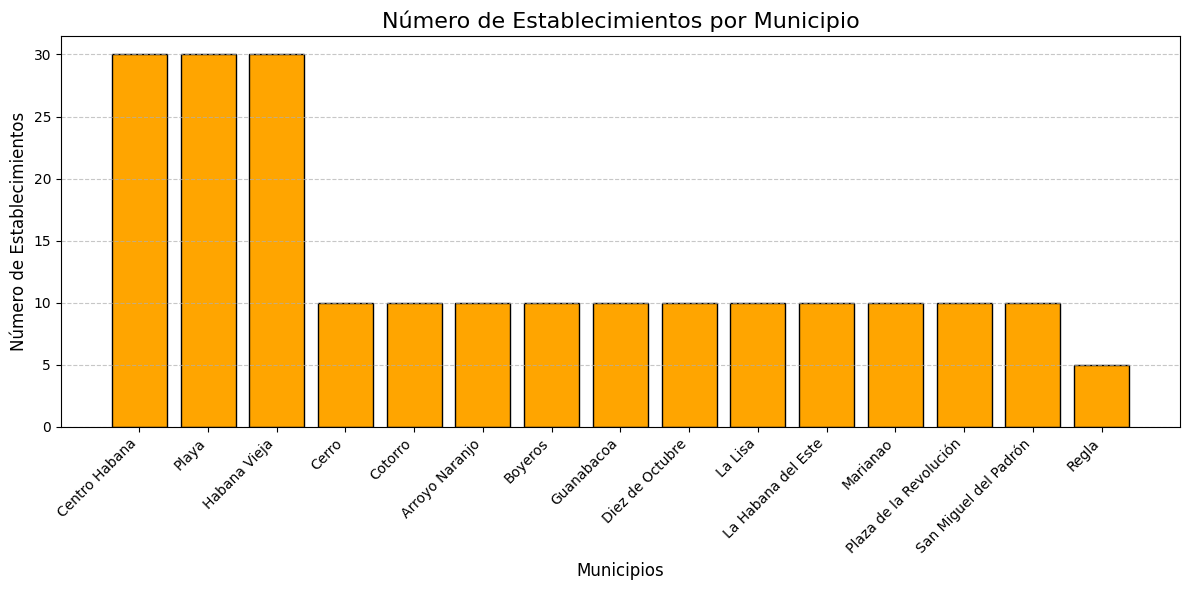

In [3]:
an.plot_local_establishments_from_df(df_municipality)


<!-- Breve descripción de los factores que afectan la elección del municipio (salario promedio, densidad poblacional, edad laboral y turismo).  -->

---

## Bien, vemos que tenemos tres lugares con 30 establecimientos. ¿Deberíamos elegir uno de esos municipios?

No necesariamente. Antes de tomar una decisión, debemos hacer un análisis. En Find Beta contamos con datos importantes como la población, la población en edad laboral, la densidad poblacional y el salario promedio. Estos datos son clave a la hora de tomar una decisión. Vamos a visualizarlos y sacar nuestras conclusiones.

---

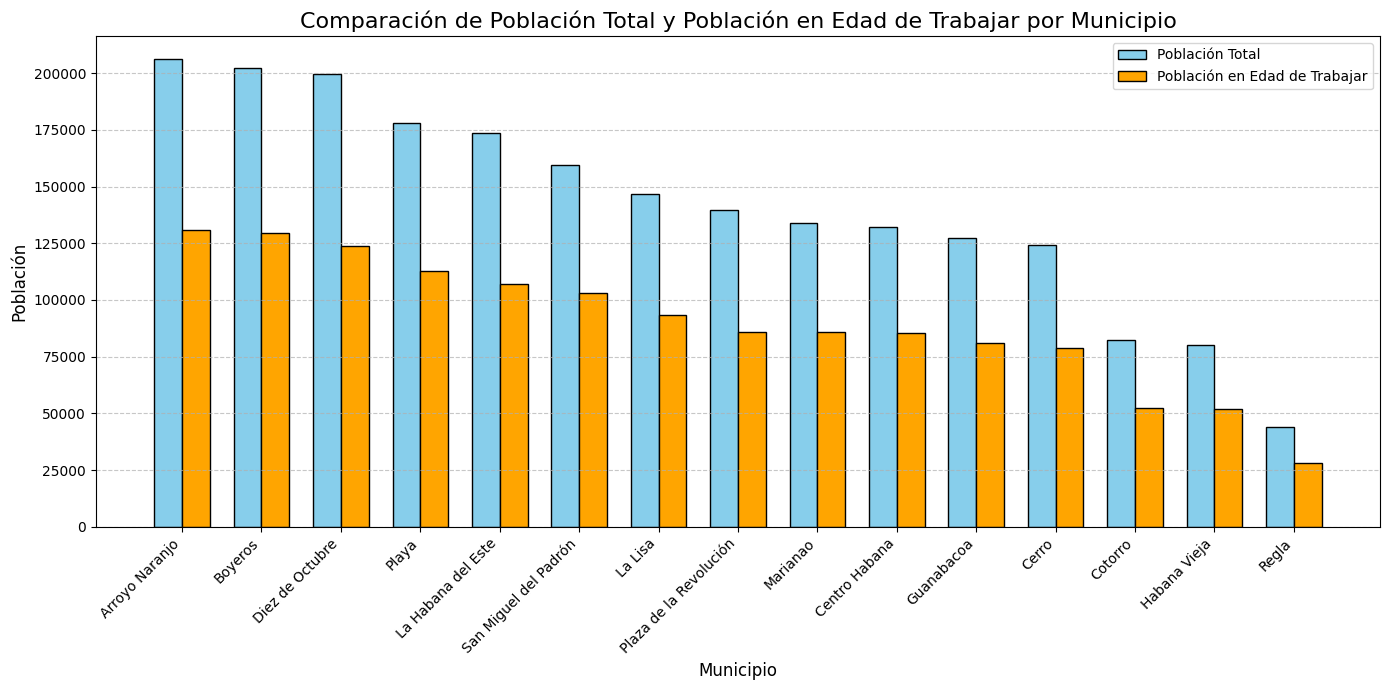

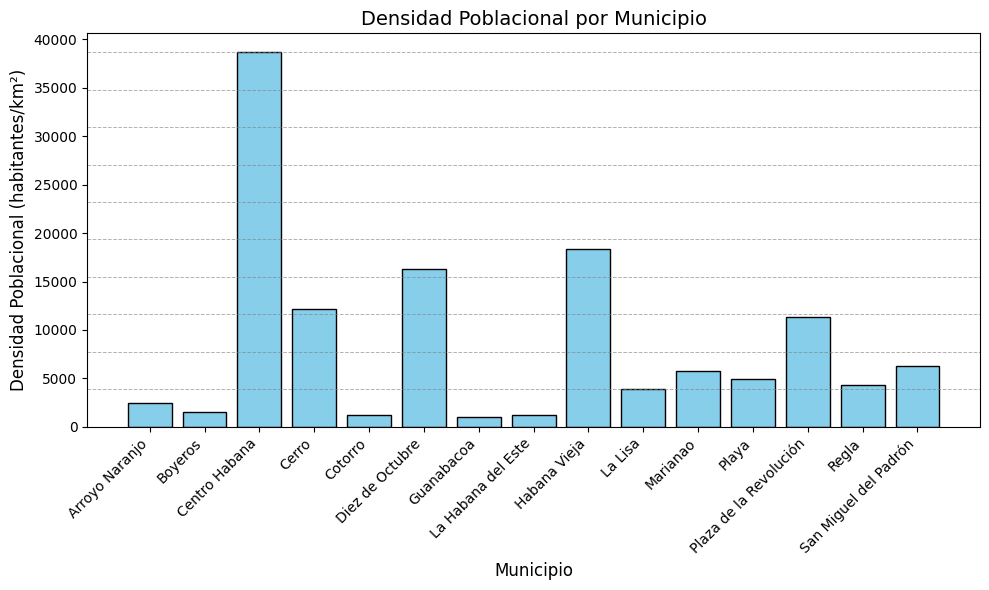

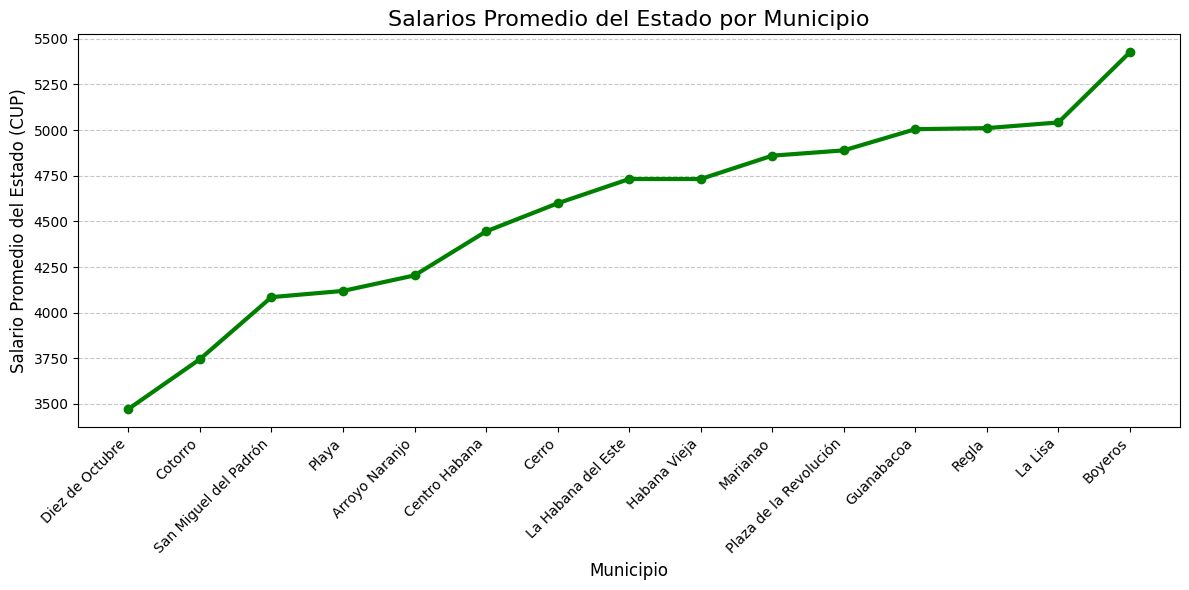

In [2]:

an.plot_population_comparison(df_municipality)
an.plot_population_density_by_municipality(df_municipality)
an.plot_salary_line(df_municipality)


---

## Ya sabes qué municipio vas a escoger

La verdad, con tantos datos, tomar una decisión puede ser complicado. Por eso tenemos una función que se encarga de crear un ranking que nos permitirá saber cuáles son los mejores municipios según los datos.

---

<!-- Analisar los criterios  -->

In [3]:
ranked_df = an.calculate_municipality_ranking(df_municipality)
ranked_df 

,name,population,population_density,working_age_population,average_state_salary,local_establishments,population_density_norm,working_age_population_norm,average_state_salary_norm,score,rank
2,Centro Habana,132294,38682.46,85554,4445,30,1.000000,0.653179,0.819053,7.763516,1
5,Diez de Octubre,199684,16260.91,124004,3472,10,0.420369,0.946733,0.639764,5.494234,2
8,Habana Vieja,80001,18306.86,52036,4732,30,0.473260,0.397279,0.871937,5.303408,3
12,Plaza de la Revolución,139539,11381.65,85946,4889,10,0.294233,0.656172,0.900866,5.191872,4
1,Boyeros,202123,1499.43,129468,5427,10,0.038763,0.988449,1.000000,5.131948,5
3,Cerro,124120,12180.57,78753,4599,10,0.314886,0.601255,0.847430,5.004343,6
9,La Lisa,146648,3948.52,93291,5042,10,0.102075,0.712248,0.929058,4.619973,7
10,Marianao,134106,5787.92,85751,4860,10,0.149626,0.654683,0.895522,4.594439,8
0,Arroyo Naranjo,206108,2508.01,130981,4204,10,0.064836,1.000000,0.774645,4.583279,9
11,Playa,177803,4965.18,112626,4119,30,0.128357,0.859865,0.758983,4.510109,10


<!-- quedarme con un municipio y porque ese  -->

---

## Entonces, ¿Centro Habana es el mejor municipio para poner un restaurante? ¿Pero cómo será ese restaurante?

No te preocupes, también puedes ver algunos datos específicos según la especialidad de los restaurantes y el conjunto de municipios que desees analizar. Por ejemplo, si tu restaurante debe cumplir con características como parqueo o reservas, pero no sabes si incluirlas, te ayudamos mostrándote cuántos de los lugares que están compitiendo contigo ya las tienen, para que puedas competir mejor.

---

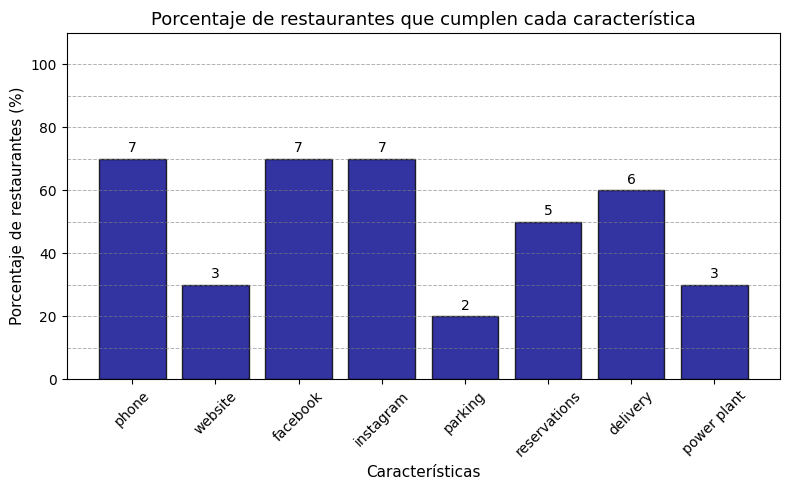

In [3]:
municipalities = ["ch", "hv", "pl"]
specialty = "Comida Italiana"

dic=an.analyze_restaurant_features(df_establishments,municipalities,specialty)
an.plot_restaurant_features(dic)

---

## ¿Qué características en contactos y servicios debemos tener?

Como podemos observar en la gráfica, tomando en cuenta las características que cumplen más del 50% de los establecimientos, necesitamos tener un número de teléfono, Facebook, Instagram, reservas, y delivery. Aunque, si podemos permitirnos las demás características, sería muy bueno para el negocio.

---

## Bien, ya tenemos algunas de las cosas que debe cumplir el restaurante. ¿Pero qué precios debemos tener para ser más competitivos?

También tenemos esa funcionalidad, donde puedes ver los precios promedio de cada una de las categorías del menú.

---


['starters', 'main_courses', 'additions', 'fittings', 'desserts', 'drinks']
[1171.4064393939393, 1900.546105518669, 488.0000562303194, 1760.0, 730.5677083333334, 841.4688518246985]


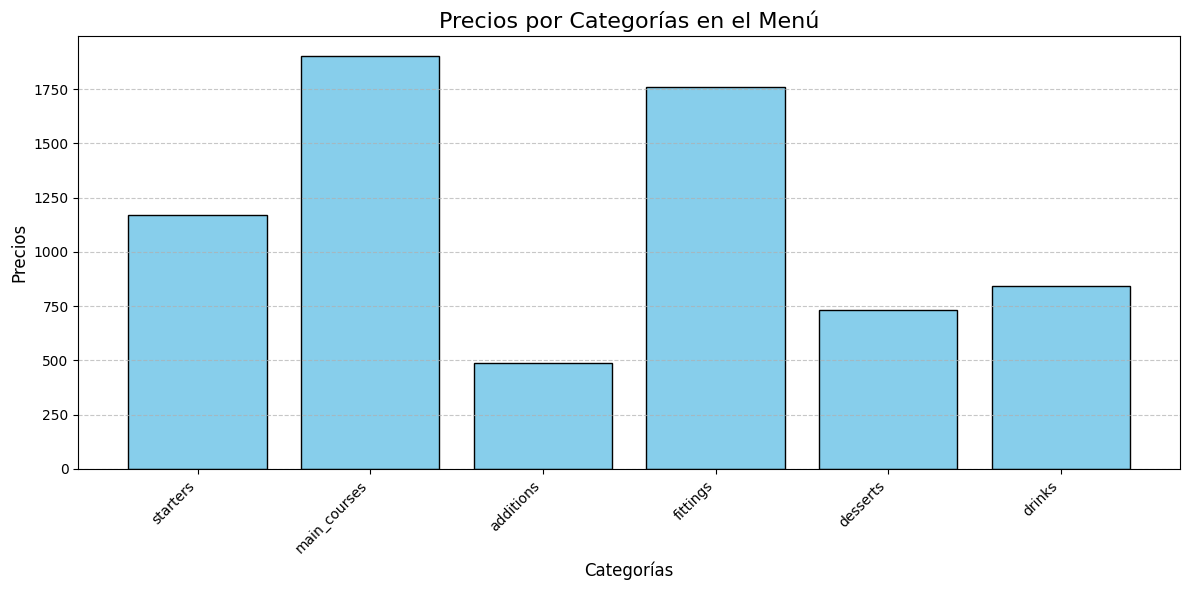

In [4]:
an.plot_avg_menu_price(df_establishments,municipalities,specialty)

--- 
 ## Ya con esto, creo que estás listo para abrir tu restaurante de comida italiana en Centro Habana.
---
## Navegación entre Notebooks
Para explorar las funcionalidades de **Find Beta**, te invitamos a visitar los siguientes notebooks:

- [Notebook Introductorio](./introduction_app.ipynb): Te introduce en Find Beta
- [Notebook de Búsquedas](./find_searches.ipynb): Realiza búsquedas personalizadas de restaurantes y bares .
---